<a href="https://colab.research.google.com/github/1kaiser/ICESAT2/blob/main/ICESAT2TrackElevationAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
global_dpi = 100

In [2]:
#@title **Download the data JANUARY 2019 26 TRACK 447** { vertical-output: true }
import pandas as pd
import json
import requests
import plotly.graph_objects as go
from plotly.offline import iplot
from pathlib import Path  

filepath = Path('ALT03_2019_jan')  
filepath.mkdir(parents=True, exist_ok=True)  

# Bounding box coordinates
left   = 76.88
right  = 77.65
bottom = 31.66
top    = 32.12

a = [["2019-01-26",447],]

df_beams = []
oa_plots = []
complete_dataset = []

# This function will request the 6 tracks using OpenAltimetry's API
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data


b =[]
for i in range(len(a)):
    OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl03?date='+a[i][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(a[i][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&sampling=false&outputFormat=json'
    OA_API_URL += '&client=jupyter';
    b.append(getData(OA_API_URL))

OA_BEAMS = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
df_beams = []

for elevation_data in b[0]:
    product = elevation_data['beam_name']

    print('\n Reading data product: ' + product)
    for series_beam in elevation_data['series']:
        if any(word in series_beam['name'] for word in OA_BEAMS):
            series = []

            data_name = 'data'

            for p in series_beam[data_name]:
                series.append({
                    'lat': p[0],
                    'lon': p[1],
                    'h': p[2]
                })

            print ('beam ' + series_beam['name'] + ' - len = ' + str(len(series)))

            if (len(series) > 0):
                df = pd.DataFrame.from_dict(series)
                print(len(df))
                df = df[(df.lon >= left) & (df.lon <= right) & (df.lat >= bottom) & (df.lat <= top)]
                print(len(df))
                df.name = series_beam['name']
                df_beams.append(df) 

    print('df_beams len: ' + str(len(df_beams)))

    # Save each data product to a separate CSV file
    for df in df_beams:
        product_name = product.replace(' ', '_')
        file_name = f'{filepath}/{product_name}_{df.name}.csv'
        df.to_csv(file_name, index=False)

    # Save noise data to a separate CSV file
    noise_df = pd.concat([df for df in df_beams if 'Noise' in df.name])
    if len(noise_df) > 0:
        noise_file_name = f'{filepath}/Noise.csv'
        noise_df.to_csv(noise_file_name, index=False)

# Combine all data products into a single CSV file
pd.concat(df_beams).to_csv(f'{filepath}/all_products.csv', index=False)

from google.colab import output
output.clear()
print("download complete !")

download complete !


In [3]:
#@title **Download the data APRIL 2019 27 TRACK 447** { vertical-output: true }
import pandas as pd
import json
import requests
import plotly.graph_objects as go
from plotly.offline import iplot
from pathlib import Path  

filepath = Path('ALT03_2019_apr')  
filepath.mkdir(parents=True, exist_ok=True)  

# Bounding box coordinates
left   = 76.88
right  = 77.65
bottom = 31.66
top    = 32.12

a = [["2019-04-27",447],]

df_beams = []
oa_plots = []
complete_dataset = []

# This function will request the 6 tracks using OpenAltimetry's API
def getData(url):
    series = []
    b_url = url

    print('Requesting data from OA >>> ',b_url)
    r = requests.get(b_url)
    data = r.json()
    return data


b =[]
for i in range(len(a)):
    OA_API_URL = 'https://openaltimetry.org/data/api/icesat2/atl03?date='+a[i][0]+'&minx='+str(left)+'&miny='+str(bottom)+'&maxx='+str(right)+'&maxy='+str(top)+'&trackId='+str(a[i][1])+'&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&sampling=false&outputFormat=json'
    OA_API_URL += '&client=jupyter';
    b.append(getData(OA_API_URL))

OA_BEAMS = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
df_beams = []

for elevation_data in b[0]:
    product = elevation_data['beam_name']

    print('\n Reading data product: ' + product)
    for series_beam in elevation_data['series']:
        if any(word in series_beam['name'] for word in OA_BEAMS):
            series = []

            data_name = 'data'

            for p in series_beam[data_name]:
                series.append({
                    'lat': p[0],
                    'lon': p[1],
                    'h': p[2]
                })

            print ('beam ' + series_beam['name'] + ' - len = ' + str(len(series)))

            if (len(series) > 0):
                df = pd.DataFrame.from_dict(series)
                print(len(df))
                df = df[(df.lon >= left) & (df.lon <= right) & (df.lat >= bottom) & (df.lat <= top)]
                print(len(df))
                df.name = series_beam['name']
                df_beams.append(df) 

    print('df_beams len: ' + str(len(df_beams)))

    # Save each data product to a separate CSV file
    for df in df_beams:
        product_name = product.replace(' ', '_')
        file_name = f'{filepath}/{product_name}_{df.name}.csv'
        df.to_csv(file_name, index=False)

    # Save noise data to a separate CSV file
    noise_df = pd.concat([df for df in df_beams if 'Noise' in df.name])
    if len(noise_df) > 0:
        noise_file_name = f'{filepath}/Noise.csv'
        noise_df.to_csv(noise_file_name, index=False)

# Combine all data products into a single CSV file
pd.concat(df_beams).to_csv(f'{filepath}/all_products.csv', index=False)

from google.colab import output
output.clear()
print("download complete !")


download complete !


In [4]:
#@title **to download satellite bands and unzip all those into their folders** { vertical-output: true }
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/ASTER_DEM.tif #getting the dem
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/modis1.zip
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/modis2.zip
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/landsat1.zip
!wget https://github.com/1kaiser/ICESAT2/releases/download/1/landsat2.zip
!unzip '*.zip'
!rm -r *.zip

from google.colab import output
output.clear()

print("complete")

complete


In [5]:
!pip install rasterio pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.5 MB/s eta 0:00:00


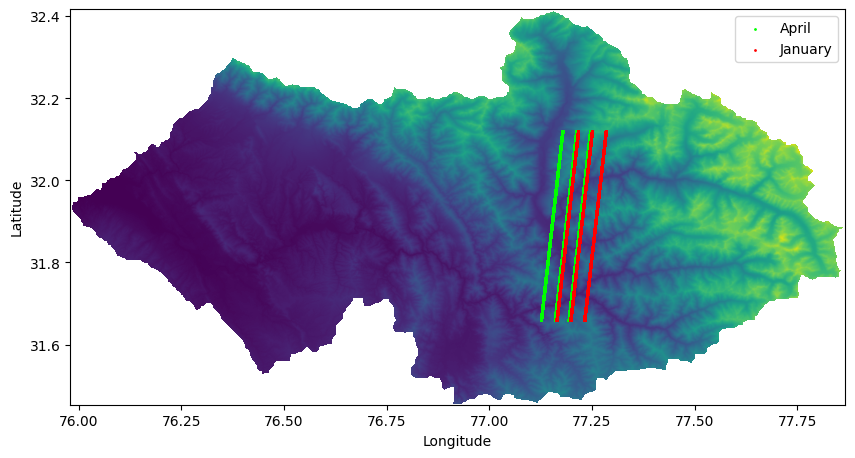

In [6]:
#@title **plotting all the tracks locations APRIL 2019 & JANUARY 2019 on the complete DEM** { vertical-output: true }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal


# Load raster image into a numpy array using gdal
raster_ds = gdal.Open('/content/ASTER_DEM.tif')

# Read the first band of the raster
raster_band = raster_ds.GetRasterBand(1)
raster_data = raster_band.ReadAsArray()

# Get the mask of the first band
mask = raster_band.GetMaskBand().ReadAsArray()

# Create a masked array from the raster data and mask
raster_masked = np.ma.masked_where(mask == 0, raster_data)

# Get the geotransform of the raster
gt = raster_ds.GetGeoTransform()

# Get the x and y pixel resolution
xres = gt[1]
yres = gt[5]

# Get the minimum and maximum x and y coordinates
xmin = gt[0]
xmax = gt[0] + (raster_ds.RasterXSize * xres)
ymin = gt[3] + (raster_ds.RasterYSize * yres)
ymax = gt[3]

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10), dpi = global_dpi)

# Show the raster image on the axis
ax.imshow(raster_masked, extent=[xmin, xmax, ymin, ymax])



# Load CSV file containing lat/lon values into a pandas dataframe
df = pd.read_csv('/content/ALT03_2019_apr/all_products.csv')
# Plot the points on the axis
ax.scatter(df['lon'], df['lat'], c='#00FF00', s=1, label='April')
# Load CSV file containing lat/lon values into a pandas dataframe
df = pd.read_csv('/content/ALT03_2019_jan/all_products.csv')
ax.scatter(df['lon'], df['lat'], c='r', s=1, label='January')

# Set the x and y axis labels to latitude and longitude
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

ax.legend()

# Show the plot
plt.show()


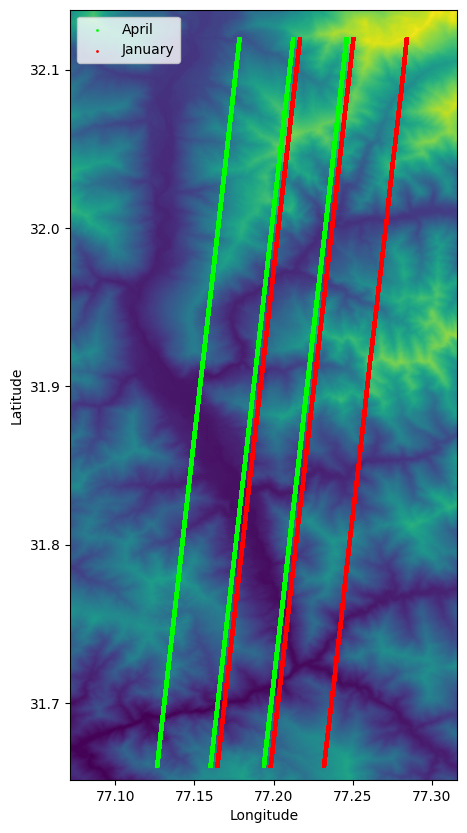

In [9]:
#@title **plotting the tracks locations APRIL 2019 on the DEM** { vertical-output: true }
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
import rasterio

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 10), dpi = global_dpi)

# Show the raster image on the axis
# ax.imshow(raster_masked, extent=[xmin, xmax, ymin, ymax])
raster_location = '/content/landsat1/HLSL30.020_B01_doy2019029_aid0001_43N.tif'
# Load the second raster image into a numpy array using gdal
crop_ds = gdal.Open(raster_location)
crop_band = crop_ds.GetRasterBand(1)
crop_data = crop_band.ReadAsArray()

# Get the mask of the second band
crop_mask = crop_band.GetMaskBand().ReadAsArray()

# Create a masked array from the crop data and mask
crop_masked = np.ma.masked_where(crop_mask == 0, crop_data)

# Get the geotransform of the second raster
crop_gt = crop_ds.GetGeoTransform()

# Get the minimum and maximum x and y coordinates of the second raster
crop_xmin = crop_gt[0]
crop_xmax = crop_gt[0] + (crop_ds.RasterXSize * crop_gt[1])
crop_ymin = crop_gt[3] + (crop_ds.RasterYSize * crop_gt[5])
crop_ymax = crop_gt[3]

# Open the DEM raster file
dem_in = rasterio.open('/content/ASTER_DEM.tif')
dem_data = dem_in.read(1, masked=True)

extent_data = rasterio.open(raster_location)
extent = dem_in.window(extent_data.bounds.left,  extent_data.bounds.bottom, extent_data.bounds.right, extent_data.bounds.top)

out_data = dem_in.read(1, window=extent, masked=True)

ax.imshow(out_data, extent=[crop_xmin, crop_xmax, crop_ymin, crop_ymax])


# Load CSV file containing lat/lon values into a pandas dataframe
df = pd.read_csv('/content/ALT03_2019_apr/all_products.csv')
# Plot the points on the axis
ax.scatter(df['lon'], df['lat'], c='#00FF00', s=1, label='April')


# Load CSV file containing lat/lon values into a pandas dataframe
df = pd.read_csv('/content/ALT03_2019_jan/all_products.csv')
# Plot the points on the axis
ax.scatter(df['lon'], df['lat'], c='r', s=1, label='January')


# Set the x and y axis labels to latitude and longitude
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
# Show the plot
plt.show()


In [ ]:
#@title **plotting the tracks passed on the dem file JANUARY 2019** { vertical-output: true }
from google.colab import output
import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform

# Define the coordinate reference systems for lat/long and UTM
in_proj = Proj('epsg:4326')  # WGS84 lat/long
out_proj = Proj('epsg:32644')  # UTM zone 44N

# Set colors for each suffix
colors = {
    'Noise': 'red',
    'Buffer': 'orange',
    'Low': 'yellow',
    'Medium': 'green',
    'High': 'blue'
}

# Set the prefixes and suffixes to iterate over
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 6), dpi = global_dpi)

# Loop through each prefix and create a new plot for each one
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')

    # Loop through each suffix and plot the elevation vs distance for the current prefix
    for j, suffix in enumerate(suffixes):
        # Find all files with the current prefix and suffix
        files = [f for f in os.listdir('/content/ALT03_2019_jan') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:
            # Loop through each file and plot the elevation vs distance
            for filename in files:
                # Read the CSV file and extract lat/long values
                df = pd.read_csv(os.path.join('/content/ALT03_2019_jan', filename))
                lats = df['lat'].tolist()
                longs = df['lon'].tolist()

                # Convert lat/long coordinates to UTM coordinates (easting, northing)
                easting, northing = transform(in_proj, out_proj, longs, lats)

                # Load the DEM data and extract the elevation values along the section
                with rasterio.open('/content/ASTER_DEM.tif') as src:
                    elevations = [x[0] for x in src.sample(zip(longs, lats))]

                # Set the color for the file based on its suffix
                color = colors[suffix]

                # Plot the elevation vs distance
                ax.scatter(easting, elevations, label=filename, color=color, s=1)

    # Set the axis labels and legend for the current prefix
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Elevation (m)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='center left' , bbox_to_anchor=(1, 0.5))

# Set the main title for the chart
fig.suptitle('Elevation vs Distance for Each Prefix and Suffix', fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

output.clear()

plt.show()


In [ ]:
#@title **plotting the tracks passed on the dem file APRIL 2019** { vertical-output: true }
from google.colab import output
import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform

# Define the coordinate reference systems for lat/long and UTM
in_proj = Proj('epsg:4326')  # WGS84 lat/long
out_proj = Proj('epsg:32644')  # UTM zone 44N

# Set colors for each suffix
colors = {
    'Noise': 'red',
    'Buffer': 'orange',
    'Low': 'yellow',
    'Medium': 'green',
    'High': 'blue'
}

# Set the prefixes and suffixes to iterate over
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 6), dpi = global_dpi)

# Loop through each prefix and create a new plot for each one
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')

    # Loop through each suffix and plot the elevation vs distance for the current prefix
    for j, suffix in enumerate(suffixes):
        # Find all files with the current prefix and suffix
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:
            # Loop through each file and plot the elevation vs distance
            for filename in files:
                # Read the CSV file and extract lat/long values
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats = df['lat'].tolist()
                longs = df['lon'].tolist()

                # Convert lat/long coordinates to UTM coordinates (easting, northing)
                easting, northing = transform(in_proj, out_proj, longs, lats)

                # Load the DEM data and extract the elevation values along the section
                with rasterio.open('/content/ASTER_DEM.tif') as src:
                    elevations = [x[0] for x in src.sample(zip(longs, lats))]

                # Set the color for the file based on its suffix
                color = colors[suffix]

                # Plot the elevation vs distance
                ax.scatter(easting, elevations, label=filename, color=color, s=1)

    # Set the axis labels and legend for the current prefix
    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Elevation (m)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='center left' , bbox_to_anchor=(1, 0.5))

# Set the main title for the chart
fig.suptitle('Elevation vs Distance for Each Prefix and Suffix', fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.6)

output.clear()

plt.show()


In [ ]:
#@title **compressed version 2 plotting the track signals only JANUARY 2019** { vertical-output: true }
from google.colab import output

import os
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import random

in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
colors = ["#FF0000", "#00FF00", "#0000FF", "#FF00FF", "#00FFFF"]
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 6), dpi=global_dpi)

for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    for j, suffix in enumerate(suffixes):
        files = [f for f in os.listdir('/content/ALT03_2019_jan') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:
            suffix_color = colors[j % len(colors)]
            for filename in files:
                df = pd.read_csv(os.path.join('/content/ALT03_2019_jan', filename))
                lats, longs, elevations = df['lat'].tolist(), df['lon'].tolist(), df['h'].tolist()
                easting, northing = transform(in_proj, out_proj, longs, lats)
                ax.scatter(easting, elevations, label=filename, color=suffix_color, s=1)

    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Elevation (m)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle('Elevation vs Distance for Each Prefix and Suffix', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.6)

output.clear()

plt.show()



In [ ]:
#@title **compressed version 2 plotting the track signals only APRIL 2019** { vertical-output: true }
from google.colab import output

import os
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import random

in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
colors = ["#FF0000", "#00FF00", "#0000FF", "#FF00FF", "#00FFFF"]
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(24, 6), dpi=global_dpi)

for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    for j, suffix in enumerate(suffixes):
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:
            suffix_color = colors[j % len(colors)]
            for filename in files:
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats, longs, elevations = df['lat'].tolist(), df['lon'].tolist(), df['h'].tolist()
                easting, northing = transform(in_proj, out_proj, longs, lats)
                ax.scatter(easting, elevations, label=filename, color=suffix_color, s=1)

    ax.set_xlabel('Easting (m)')
    ax.set_ylabel('Elevation (m)')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle('Elevation vs Distance for Each Prefix and Suffix', fontsize=16)
plt.subplots_adjust(wspace=0.3, hspace=0.6)

output.clear()

plt.show()



In [ ]:
#@title **NDSI for 1 february & 1 may** { vertical-output: true }
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

# Define the file names and paths
folder = "/content/landsat1/"

# Read the band files and calculate NDSI
ndsi_array = None

red = rasterio.open("/content/landsat1/HLSL30.020_B03_doy2019029_aid0001_43N.tif").read(1)
green = rasterio.open("/content/landsat1/HLSL30.020_B06_doy2019029_aid0001_43N.tif").read(1)
# Calculate NDSI
ndsi = (green.astype(float) - red.astype(float)) / (green.astype(float) + red.astype(float))
# Add the NDSI to the array
if ndsi_array is None:
    ndsi_array = ndsi
else:
    ndsi_array = np.concatenate((ndsi_array, ndsi), axis=0)

# Plot the NDSI array
fig, ax = plt.subplots(1,2, figsize=(10, 10), dpi = global_dpi)

im = ax[0].imshow(ndsi_array, cmap='coolwarm', vmin=-1, vmax=1)
cbar = fig.colorbar(im, ax=ax[0], shrink=0.6)
ax[0].set_title('Normalized Difference Snow Index (NDSI)')

red = rasterio.open("/content/landsat2/HLSL30.020_B03_doy2019109_aid0001_43N.tif").read(1)
green = rasterio.open("/content/landsat2/HLSL30.020_B06_doy2019109_aid0001_43N.tif").read(1)
ndsi_array = (green.astype(float) - red.astype(float)) / (green.astype(float) + red.astype(float))
im = ax[1].imshow(ndsi_array, cmap='coolwarm', vmin=-1, vmax=1)
cbar = fig.colorbar(im, ax=ax[1], shrink=0.6)
ax[1].set_title('Normalized Difference Snow Index (NDSI)')


from google.colab import output
output.clear()

plt.show()


In [ ]:
#@title **test landsat 2** { vertical-output: true }
from google.colab import output

import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import random

# Set up projections
in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')

# Define the names of the CSV files
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

# Set up figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20), dpi = global_dpi)

# Read in the NDSI data
src = rasterio.open("/content/landsat2/HLSL30.020_B03_doy2019109_aid0001_43N.tif")
red = src.read(1)
green = rasterio.open("/content/landsat2/HLSL30.020_B06_doy2019109_aid0001_43N.tif").read(1)
ndsi_array = (green.astype(float) - red.astype(float)) / (green.astype(float) + red.astype(float))

# Loop through each prefix and suffix
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    

    # Add NDSI to the plot as background with a color bar
    ax.imshow(ndsi_array, cmap='coolwarm', vmin=-1, vmax=1, alpha=1)
    cbar = plt.colorbar(ax.images[-1], ax=axes[i//2, i%2], fraction=0.046, pad=0.04)
    cbar.set_label('NDSI')

    # Loop through each suffix and overlay the CSV data on the NDSI map
    for j, suffix in enumerate(suffixes):
        prefix_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
        # Get a list of CSV files with the given prefix and suffix
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        
        if len(files) > 0:
            for filename in files:

                # Read in the CSV file and convert lat/lon to easting/northing
                df = pd.read_csv('/content/ALT03_2019_apr/'+ str(filename))
                # lats, longs = df['lat'].tolist(), df['lon'].tolist()
                # easting, northing = transform(in_proj, out_proj, longs, lats)

                # df = pd.read_csv('/content/ALT03_2019_apr/all_products.csv')
                # Plot the points on the axis
                ax.scatter(df['lat'], df['lon'], label=suffix, color=prefix_color, s=1, alpha=1)
                
                # Plot the lat/lon points on top of the NDSI map
                # ax.scatter(longs, lats, label=suffix, color=prefix_color, s=10, alpha=1)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Add legend to the plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.7, 0.9))

# Set the main title
fig.suptitle('Latitude vs Longitude for Each Prefix and Suffix', fontsize=16)

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.25)

output.clear()

# Show the plot
plt.show()


In [ ]:
#@title **test landsat 1** { vertical-output: true }
from google.colab import output

import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import random

# Set up projections
in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')

# Define the names of the CSV files
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

# Set up figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20), dpi = global_dpi)

# Read in the NDSI data
src = rasterio.open("/content/landsat1/HLSL30.020_B03_doy2019029_aid0001_43N.tif")
red = src.read(1)
green = rasterio.open("/content/landsat1/HLSL30.020_B06_doy2019029_aid0001_43N.tif").read(1)
ndsi_array = (green.astype(float) - red.astype(float)) / (green.astype(float) + red.astype(float))

# Loop through each prefix and suffix
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    prefix_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    # Add NDSI to the plot as background with a color bar
    ax.imshow(ndsi_array, cmap='coolwarm', vmin=-1, vmax=1, alpha=1)
    cbar = plt.colorbar(ax.images[-1], ax=axes[i//2, i%2], fraction=0.046, pad=0.04)
    cbar.set_label('NDSI')

    # Loop through each suffix and overlay the CSV data on the NDSI map
    for j, suffix in enumerate(suffixes):
        # Get a list of CSV files with the given prefix and suffix
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        
        if len(files) > 0:
            for filename in files:
                # Read in the CSV file and convert lat/lon to easting/northing
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats, longs = df['lat'].tolist(), df['lon'].tolist()
                easting, northing = transform(in_proj, out_proj, longs, lats)
                
                # Plot the lat/lon points on top of the NDSI map
                ax.scatter(longs, lats, label=suffix, color=prefix_color, s=10, alpha=1)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Add legend to the plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.7, 0.9))

# Set the main title
fig.suptitle('Latitude vs Longitude for Each Prefix and Suffix', fontsize=16)

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.25)


output.clear()

# Show the plot
plt.show()


In [ ]:
#@title DEM output { vertical-output: true }
import rasterio
import matplotlib.pyplot as plt

# Open the DEM raster file
dem_in = rasterio.open('/content/ASTER_DEM.tif')
dem_data = dem_in.read(1, masked=True)

extent_data = rasterio.open('/content/landsat1/HLSL30.020_B01_doy2019029_aid0001_43N.tif')
extent = dem_in.window(extent_data.bounds.left,  extent_data.bounds.bottom, extent_data.bounds.right, extent_data.bounds.top)

out_data = dem_in.read(1, window=extent, masked=True)

# Create a new figure and axis
fig, ax = plt.subplots(dpi = global_dpi)

# Plot the DEM raster data as an image
im = ax.imshow(out_data,  cmap='terrain')

# Add a color bar for the DEM data
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('Elevation (m)')

# Set the title and axis labels
ax.set_title('Digital Elevation Model')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [ ]:
#@title **plotting NDSI and Saving** { vertical-output: true }
import os
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform

# Set up projections
in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')

# Read in the NDSI data
src = rasterio.open("/content/landsat2/HLSL30.020_B03_doy2019109_aid0001_43N.tif")
red = src.read(1)
green = rasterio.open("/content/landsat2/HLSL30.020_B06_doy2019109_aid0001_43N.tif").read(1)
ndsi_array = (green.astype(float) - red.astype(float)) / (green.astype(float) + red.astype(float))

# Plot the NDSI map
fig, ax = plt.subplots(figsize=(10, 10), dpi=100)
im = ax.imshow(ndsi_array, cmap='coolwarm', vmin=-1, vmax=1, alpha=1)
cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label('NDSI')
ax.set_title('NDSI')

# Save the NDSI output as a GeoTIFF file
with rasterio.open(
    '/content/ndsi_output.tif',
    'w',
    driver='GTiff',
    height=ndsi_array.shape[0],
    width=ndsi_array.shape[1],
    count=1,
    dtype=ndsi_array.dtype,
    crs=src.crs,
    transform=src.transform,
) as dst:
    dst.write(ndsi_array, 1)


from google.colab import output
output.clear()
plt.show()


In [ ]:
#@title laser rack plot in the basin{ vertical-output: true }
from google.colab import output

import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform



in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

fontS = 12

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(5, 10), dpi = global_dpi)
fig.subplots_adjust(hspace=0.3)


# Open the DEM raster file
dem_in = rasterio.open('/content/ASTER_DEM.tif')
dem_data = dem_in.read(1, masked=True)

extent_data = rasterio.open('/content/landsat1/HLSL30.020_B01_doy2019029_aid0001_43N.tif')
extent = dem_in.window(extent_data.bounds.left,  extent_data.bounds.bottom, extent_data.bounds.right, extent_data.bounds.top)

out_data = dem_in.read(1, window=extent, masked=True)


all_dem_data = []
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    prefix_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    
    im = ax.imshow(out_data,  cmap='terrain')


    for j, suffix in enumerate(suffixes):
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:
            for filename in files:
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats, longs = df['lat'].tolist(), df['lon'].tolist()
                easting, northing = transform(in_proj, out_proj, longs, lats)
                dem_data = list(rasterio.open('/content/ASTER_DEM.tif').sample(zip(longs, lats)))
                all_dem_data.extend(dem_data)

                ax.scatter(longs, lats, label=suffix, color=prefix_color, s=5, zorder=10)

    ax.set_xlabel('Longitude', fontsize = int(fontS * 1.1))
    ax.set_ylabel('Latitude', fontsize = int(fontS * 1.1))

    ax.set_aspect('equal')

# calculate min and max values for color bar
vmin = min(all_dem_data)[0]
vmax = max(all_dem_data)[0]

# create a single color bar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# add color bar to the figure
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(sm, cax=cbar_ax)

# Adjust the position and size of the colorbar axis based on the height of the grid of plots
fig.subplots_adjust(right=0.9)  # Make space for the colorbar axis
fig.subplots_adjust(hspace=0.5)  # Adjust the height of the grid of plots
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')
cbar_ax.spines['left'].set_position(('outward', 10))
cbar_ax.set_ylabel('Elevation (m)', fontsize = int(fontS * 1.1))

fig.suptitle('Latitude vs Longitude for Each Prefix and Suffix', fontsize= int(fontS * 1.5), y = 0.99)
plt.tight_layout()


output.clear()

plt.show()


In [ ]:
#@title **complete Basin Dem** { vertical-output: true }
import matplotlib.pyplot as plt
import rasterio
import numpy as np
# Open the DEM file
with rasterio.open('/content/ASTER_DEM.tif') as dem:

    # Read the DEM data
    dem_data = dem.read(1, masked=True)

    # Get the spatial reference system (CRS) of the DEM
    crs = dem.crs

    # Get the extent of the DEM
    xmin, ymin, xmax, ymax = dem.bounds

    # Get the pixel size of the DEM
    xres, yres = dem.res

    # Create a grid of x and y coordinates
    x = xmin + xres * 0.5 + (dem.width - 1) * xres * \
        (0.5 if dem.transform.a == -xres else -0.5)
    y = ymax - yres * 0.5 - (dem.height - 1) * yres * \
        (0.5 if dem.transform.e == -yres else -0.5)
    xx, yy = np.meshgrid(x, y)

    # Create a new figure and axis
    fig, ax = plt.subplots(figsize=(10, 10), dpi = global_dpi)

    # Plot the DEM data as a color map
    cmap = plt.cm.terrain
    im = ax.imshow(dem_data, cmap=cmap, extent=[xmin, xmax, ymin, ymax])

    # Add a color bar
    cbar = fig.colorbar(im, ax=ax, shrink=0.75)
    cbar.ax.set_ylabel('Elevation (m)')

    # Set the axis labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Digital Elevation Model (DEM)')

    from google.colab import output
    output.clear()
    # Show the plot
    plt.show()


In [ ]:
#@title **plotting all lat\lon values** { vertical-output: true }
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import pyproj

# Read the CSV file
df = pd.read_csv('/content/ALT03_2019_apr/all_products.csv')

# Extract the lat/long values
lats = df['lat'].tolist()
longs = df['lon'].tolist()

# Define the projection
utm_proj = pyproj.Proj(src.crs)

# Convert longitude and latitude to UTM coordinates
x_coords, y_coords = utm_proj(longs, lats)

# Load the DEM data
with rasterio.open('/content/ASTER_DEM.tif') as src:
    # Extract the elevation values along the section
    elevations = [x[0] for x in src.sample(zip(longs, lats))]
    # print(elevations)

# Create a plot of elevation vs longitude
fig, ax = plt.subplots(dpi = global_dpi)
ax.scatter(x_coords, elevations, s = 1)
ax.set_xlabel('X Coordinates (m)')
ax.set_ylabel('Elevation')
plt.show()


In [ ]:
#@title **plotting tracks data on the satellite imagery** { vertical-output: true }
import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import random

in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

# Set up figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20), dpi = global_dpi)

src = rasterio.open("/content/landsat2/HLSL30.020_B03_doy2019109_aid0001_43N.tif")
red = rasterio.open("/content/landsat2/HLSL30.020_B03_doy2019109_aid0001_43N.tif").read(1)
green = rasterio.open("/content/landsat2/HLSL30.020_B06_doy2019109_aid0001_43N.tif").read(1)
ndsi_array = (green.astype(float) - red.astype(float)) / (green.astype(float) + red.astype(float))


# Loop through each prefix and suffix
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    prefix_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    # Add DEM to the plot as background with a color bar
    # dem_array = dem.read(1)
    
    ax.imshow(ndsi_array, cmap='coolwarm', vmin=-1, vmax=1)
    cbar = plt.colorbar(ax.images[-1], ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('Elevation (m)')
    
    for j, suffix in enumerate(suffixes):
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:

            for filename in files:
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats, longs = df['lat'].tolist(), df['lon'].tolist()
                easting, northing = transform(in_proj, out_proj, longs, lats)

                # Load DEM data
                # dem = rasterio.open('/content/landsat2/HLSL30.020_B01_doy2019109_aid0001_43N.tif')

                # Plot lat/lon points and set alpha to 0.5 for visibility of DEM underneath
                ax.scatter(longs, lats, label=suffix, color=prefix_color, s=5, alpha=0.5)



    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

# Add legend to the plot
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.5, 1.02), ncol=len(suffixes))

# Set the main title
fig.suptitle('Latitude vs Longitude for Each Prefix and Suffix', fontsize=16)

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.25)


from google.colab import output
output.clear()
# Show the plot
plt.show()


In [ ]:
#@title **plotting track signals over the map** { vertical-output: true }
import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import random

in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

# Set up figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20), dpi = global_dpi)

src = rasterio.open("/content/landsat2/HLSL30.020_B03_doy2019109_aid0001_43N.tif")
red = src.read(1)
green = rasterio.open("/content/landsat2/HLSL30.020_B06_doy2019109_aid0001_43N.tif").read(1)
ndsi_array = (green.astype(float) - red.astype(float)) / (green.astype(float) + red.astype(float))

# Loop through each prefix and suffix
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    prefix_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    # Add NDSI to the plot as background with a color bar
    ax.imshow(ndsi_array, cmap='coolwarm', vmin=-1, vmax=1)
    cbar = plt.colorbar(ax.images[-1], ax=axes[i//2, i%2], fraction=0.046, pad=0.04)
    cbar.set_label('NDSI')

    # Loop through each suffix and overlay the CSV data on the NDSI map
    for j, suffix in enumerate(suffixes):
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:
            for filename in files:
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats, longs = df['lat'].tolist(), df['lon'].tolist()
                easting, northing = transform(in_proj, out_proj, longs, lats)
                ax.scatter(longs, lats, label=suffix, color=prefix_color, s=5, alpha=0.5)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Add legend to the plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='upper left')

# Set the main title
fig.suptitle('Latitude vs Longitude for Each Prefix and Suffix', fontsize=16)

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.25)

from google.colab import output
output.clear()
# Show the plot
plt.show()


In [ ]:
#@title **plotting tracks on map raster** { vertical-output: true }
import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import random

# Set up projections
in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')

# Define the names of the CSV files
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

# Set up figure with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(10, 20), dpi = global_dpi)

# Read in the NDSI data
src = rasterio.open("/content/landsat2/HLSL30.020_B03_doy2019109_aid0001_43N.tif")
red = src.read(1)
green = rasterio.open("/content/landsat2/HLSL30.020_B06_doy2019109_aid0001_43N.tif").read(1)
ndsi_array = (green.astype(float) - red.astype(float)) / (green.astype(float) + red.astype(float))

# Loop through each prefix and suffix
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    prefix_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    # Add NDSI to the plot as background with a color bar
    ax.imshow(ndsi_array, cmap='coolwarm', vmin=-1, vmax=1, alpha=0.2)
    cbar = plt.colorbar(ax.images[-1], ax=axes[i//2, i%2], fraction=0.046, pad=0.04)
    cbar.set_label('NDSI')

    # Loop through each suffix and overlay the CSV data on the NDSI map
    for j, suffix in enumerate(suffixes):
        # Get a list of CSV files with the given prefix and suffix
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        
        if len(files) > 0:
            for filename in files:
                # Read in the CSV file and convert lat/lon to easting/northing
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats, longs = df['lat'].tolist(), df['lon'].tolist()
                easting, northing = transform(in_proj, out_proj, longs, lats)
                
                # Plot the lat/lon points on top of the NDSI map
                ax.scatter(longs, lats, label=suffix, color=prefix_color, s=10, alpha=1)

    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')

    # Add legend to the plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, labels, loc='lower right', bbox_to_anchor=(1.7, 0.9))

# Set the main title
fig.suptitle('Latitude vs Longitude for Each Prefix and Suffix', fontsize=16)

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.25)

from google.colab import output
output.clear()
# Show the plot
plt.show()


In [ ]:
#@title **plotting tracks** { vertical-output: true }
import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform

in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

fontS = 12

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(4, 24), dpi = global_dpi)
fig.subplots_adjust(hspace=0.3)

all_dem_data = []
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    prefix_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    
    for j, suffix in enumerate(suffixes):
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:
            for filename in files:
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats, longs = df['lat'].tolist(), df['lon'].tolist()
                easting, northing = transform(in_proj, out_proj, longs, lats)
                dem_data = list(rasterio.open('/content/ASTER_DEM.tif').sample(zip(longs, lats)))
                all_dem_data.extend(dem_data)

                ax.scatter(longs, lats, label=suffix, color=prefix_color, s=5, zorder=10)

    ax.set_xlabel('Longitude', fontsize = int(fontS * 1.1))
    ax.set_ylabel('Latitude', fontsize = int(fontS * 1.1))
    ax.set_aspect('equal')

# calculate min and max values for color bar
vmin = min(all_dem_data)[0]
vmax = max(all_dem_data)[0]

# create a single color bar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# add color bar to the figure
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(sm, cax=cbar_ax)

# Adjust the position and size of the colorbar axis based on the height of the grid of plots
fig.subplots_adjust(right=0.9)  # Make space for the colorbar axis
fig.subplots_adjust(hspace=0.5)  # Adjust the height of the grid of plots
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')
cbar_ax.spines['left'].set_position(('outward', 10))
cbar_ax.set_ylabel('Elevation (m)', fontsize = int(fontS * 1.1))

fig.suptitle('Latitude vs Longitude for Each Prefix and Suffix', fontsize= int(fontS * 1.5), y = 0.99)
plt.tight_layout()

from google.colab import output
output.clear()
plt.show()


In [ ]:
import os
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
from pyproj import Proj, transform

in_proj, out_proj = Proj('epsg:4326'), Proj('epsg:32644')
suffixes = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
prefixes = ['gt3r', 'gt3l', 'gt2r', 'gt2l', 'gt1r', 'gt1l']

fontS = 12

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
fig.subplots_adjust(hspace=0.3)

# Open the DEM raster file
dem_in = rasterio.open('/content/ASTER_DEM.tif')
dem_data = dem_in.read(1, masked=True)

extent_data = rasterio.open('/content/landsat1/HLSL30.020_B01_doy2019029_aid0001_43N.tif')
extent = dem_in.window(extent_data.bounds.left,  extent_data.bounds.bottom, extent_data.bounds.right, extent_data.bounds.top)

out_data = dem_in.read(1, window=extent, masked=True)

all_dem_data = []
for i, prefix in enumerate(prefixes):
    ax = axes[i//2, i%2]
    ax.set_title(f'{prefix}')
    prefix_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))
    
    im = ax.imshow(out_data,  cmap='terrain')

    for j, suffix in enumerate(suffixes):
        files = [f for f in os.listdir('/content/ALT03_2019_apr') if f.startswith(prefix) and f.endswith(suffix+'.csv')]
        if len(files) > 0:
            for filename in files:
                df = pd.read_csv(os.path.join('/content/ALT03_2019_apr', filename))
                lats, longs, hs = df['lat'].tolist(), df['lon'].tolist(), df['h'].tolist()

                # Plot the points on the DEM
                ax.scatter(longs, lats, cmap='viridis', label=suffix, s=5, zorder=10)

    ax.set_xlabel('Longitude', fontsize = int(fontS * 1.1))
    ax.set_ylabel('Latitude', fontsize = int(fontS * 1.1))

    ax.set_aspect('equal')

# create a single color bar
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# add color bar to the figure
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
fig.colorbar(sm, cax=cbar_ax)

# Adjust the position and size of the colorbar axis based on the height of the grid of plots
fig.subplots_adjust(right=0.9)  # Make space for the colorbar axis
fig.subplots_adjust(hspace=0.5)  # Adjust the height of the grid of plots
cbar_ax.yaxis.set_ticks_position('right')
cbar_ax.yaxis.set_label_position('right')
cbar_ax.spines['left'].set_position(('outward', 10))
cbar_ax.set_ylabel('Elevation (m)', fontsize = int(fontS * 1.1))


fig.suptitle('Latitude vs Longitude for Each Prefix and Suffix', fontsize= int(fontS * 1.5), y = 0.99)
plt.tight_layout()

from google.colab import output
output.clear()

plt.show()